# POC for Genetic Algorithm WOLT

### Imports

In [ ]:
import pygad
import numpy as np
import pandas as pd
import time
from IPython.display import Image, display
from copy import deepcopy

### helper functions:

In [ ]:
NO_IMAGE_URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/No_image_available.svg/1024px-No_image_available.svg.png'

In [ ]:
# def print_dish(dish):
#     print('-' * 50)
#     print(f'{dish["name"]} - {dish["price"]} ₪')
    
#     if type(dish["image"]) == str:
#         display(Image(url=dish["image"], width=400, height=400))
#     else:
#         display(Image(url=NO_IMAGE_URL, width=200, height=200))

#     print(f'vegetarian: {"✅" if dish["vegetarian"] else "❌"}', end=' ')
#     print(f'GF: {"✅" if dish["GF"] else "❌"}', end=' ')
#     print(f'spicy: {"✅" if dish["spicy"] else "❌"}', end=' ')
#     print(f'alcohol_percentage: {"✅" if dish["alcohol_percentage"] else "❌"}')
#     print('-' * 50)


In [ ]:
def print_dish(solution, const, i):
    dish  = solution[i]
    
    print('-' * 50)
    print(f'{dish["name"]} - {dish["price"]} ₪')
    
    if type(dish["image"]) == str:
        display(Image(url=dish["image"], width=400, height=400))
    else:
        display(Image(url=NO_IMAGE_URL, width=200, height=200))
    
    print(f'price: {"✅" if dish["price"] <= const["price"][i] else f"❌"}', end=' ')
    print(f'vegetarian: {"✅" if dish["vegetarian"] == const["vegetarian"][i] else f"❌"}', end=' ')
    print(f'GF: {f"✅" if dish["GF"] == const["GF"][i] else f"❌"}', end=' ')
    print(f'spicy: {f"✅" if dish["spicy"] == const["spicy"][i] else f"❌"}', end=' ')
    print(f'alcohol: {f"✅" if (dish["alcohol_percentage"] > 0) == const["alcohol_percentage"][i] else f"❌"}')

    print('-' * 50)



In [ ]:
def get_user_input(people, kosher, cuisines, price, vegetarian, GF, spicy, alcohol_percentage, min_rating):
    return dict(people             = people,
                kosher             = kosher,
                cuisines           = cuisines,
                price              = price,
                vegetarian         = vegetarian,
                GF                 = GF,
                spicy              = spicy,
                alcohol_percentage = alcohol_percentage,
                min_rating         = max(min_rating))

### Loss (fitness) function:

In [ ]:
def fitness_function(solution, solution_idx):
    solution = [database.iloc[i] for i in solution]

    price_const = [(dish['price'] <= inp) for (dish, inp) in zip(solution, user_input['price'])]

    vegetarian_const = [dish['vegetarian'] == inp for (dish, inp) in zip(solution, user_input['vegetarian'])]    
    GF_const = [dish['GF'] == inp for (dish, inp) in zip(solution, user_input['GF'])]    
    spicy_const = [dish['spicy'] == inp for (dish, inp) in zip(solution, user_input['spicy'])]    
    alcohol_percentage_const = [(dish['alcohol_percentage'] > 0) == inp for (dish, inp) in zip(solution, user_input['alcohol_percentage'])]  
    
    hard_const = all([all(price_const),
                      all(vegetarian_const),
                      all(GF_const),
                      all(spicy_const),
                      all(alcohol_percentage_const)])
    
    soft_price = np.mean([s * (p['price']/ip) for (s, (p, ip)) in zip(price_const, zip(solution, user_input["price"]))])
    
    soft_const = np.mean([soft_price,
                          sum(vegetarian_const)         / user_input['people'], 
                          sum(GF_const)                 / user_input['people'],
                          sum(spicy_const)              / user_input['people'],
                          sum(alcohol_percentage_const) / user_input['people'],
                         ])
    fitness = np.mean([int(hard_const), soft_const])
    res.append(fitness)

    return fitness

### Initialize

In [ ]:
res = []

In [ ]:
# load database:
total_df = pd.read_csv('./data/csv_wolt_menus_21-8-22.csv')
rest_df = pd.read_csv('./data/20_rest_sample.csv').set_index('name')
groups = [g for g in total_df.groupby('rest_name') if g[0] in list(rest_df.index)][::-1]

### User input:

In [ ]:
# # file 1:
# user_input = get_user_input(people             = 3,
#                             kosher             = False,
#                             cuisines           = ['burger', 'hummus', 'salad'],
#                             price              = [80, 80, 80],
#                             vegetarian         = [0, 1, 0],
#                             GF                 = [0, 0, 0],
#                             spicy              = [0, 0, 1],
#                             alcohol_percentage = [0, 0, 0],
#                             min_rating         = [7, 5, 6])

# # file 2:
# user_input = get_user_input(people             = 3,
#                             kosher             = True,
#                             cuisines           =  ['burger', 'meat', 'bagel', 'thai', 'salad','thai'],
#                             price              = [90, 80, 100],
#                             vegetarian         = [0, 1, 0],
#                             GF                 = [0, 0, 0],
#                             spicy              = [0, 0, 1],
#                             alcohol_percentage = [0, 0, 0],
#                             min_rating         = [7, 5, 6])



# file 3:
base_user_input = get_user_input(people             = 3,
                                 kosher             = False,
                                 cuisines           = ['fresh','mediterranean','healthy','salad',
                                                       'asian', 'japanese','thai', 'tortilla','mexican','nacho'],
                                 price              = [75, 100, 60],
                                 vegetarian         = [1, 0, 0],
                                 GF                 = [0, 1, 0],
                                 spicy              = [0, 1, 1],
                                 alcohol_percentage = [0, 0, 0], # todo
                                 min_rating         = [7, 8, 1])


# # file 4:
# user_input = get_user_input(people             = 3,
#                             kosher             = False,
#                             cuisines           = [],
#                             price              = [60, 60, 60],
#                             vegetarian         = [1, 1, 1],
#                             GF                 = [0, 0, 1],
#                             spicy              = [1, 0, 1],
#                             alcohol_percentage = [0, 0, 0], # todo
#                             min_rating         = [4, 6, 6])




base_user_input

In [ ]:
[g[0] for g in groups]

# Algorithm run:

In [ ]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** 3)

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('.', end='')
    
    rest_input = rest_df.loc[restaurant]
    
    delivery_per_person = rest_input["delivery price"] / 3
    user_input = deepcopy(base_user_input)
    user_input["price"] = [p - delivery_per_person for p in user_input["price"]]
#     print(user_input["price"])
    
    
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')



In [ ]:
best_solution

In [ ]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')


In [ ]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')



In [ ]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')




In [ ]:
from LossFunc import loss, user_inputs_to_loss_function_inputs
from main import get_diners_constraints


In [ ]:
c = get_diners_constraints('./diners_input_constarints/input_constraints_2.txt')

In [ ]:
d = pd.read_csv('./data/csv_wolt_restaurants_21-8-22.csv')
d = d[d.name == best_solution[0].rest_name]

In [ ]:
loss(user_inputs_to_loss_function_inputs(pd.Series(c[0]),
                                         pd.Series(c[1]),
                                         pd.Series(c[2]),
                                         d,
                                         pd.Series(best_solution[0]),
                                         pd.Series(best_solution[0]),
                                         pd.Series(best_solution[0])))

In [ ]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')




In [16]:
best_solution

[rest_name                                        Wok Republic | Allenby
 name                                        צ'יקן סאטה נודלס רידיפיין 🌱
 price                                                              62.0
 alcohol_percentage                                                  0.0
 vegetarian                                                         True
 GF                                                                False
 image                 https://wolt-menu-images-cdn.wolt.com/menu-ima...
 days                                              [1, 2, 3, 4, 5, 6, 7]
 spicy                                                             False
 Name: 22, dtype: object,
 rest_name                                        Wok Republic | Allenby
 name                                    ‫קונג פאו נודלס ללא גלוטן 🌾  🌶🌶
 price                                                              57.0
 alcohol_percentage                                                  0.0
 vegetarian              

------- Searching space of size 30676897 -------

...............
best fitness updated to 0.46
................................................
best fitness updated to 0.971---> a solution was found ! 🏆 (2.705s)
...............................................................................................................
best fitness updated to 0.98
...............
best fitness updated to 0.989
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
best fitness updated to 0.995
..............................................................................

price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------
--------------------------------------------------
‫פיצה מרגריטה טבעונית 🌱 - 79.0 ₪


price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------
--------------------------------------------------
פיצה חריפה🌶 - 87.0 ₪


price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------

Evolution Plot:


<AxesSubplot:>

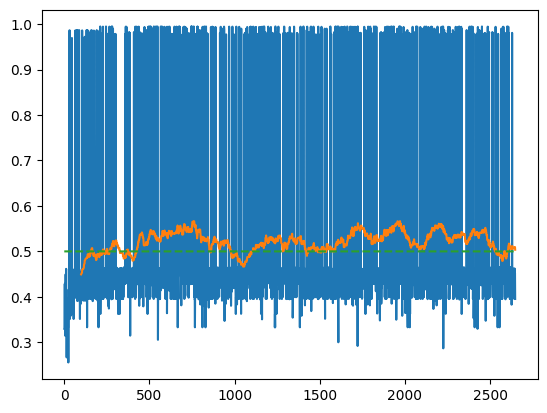

In [40]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')


------- Searching space of size 30676897 -------

...
best fitness updated to 0.362
...............
best fitness updated to 0.394
.........
best fitness updated to 0.449
....................................................................................................................................
best fitness updated to 0.451
.................................................................................
best fitness updated to 0.457
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------
--------------------------------------------------
‫קונג פאו נודלס ללא גלוטן 🌾  🌶🌶 - 57.0 ₪


price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------
--------------------------------------------------
‫שנחאי נודלס 🌶🌶 - 59.0 ₪


price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------

Evolution Plot:


<AxesSubplot:>

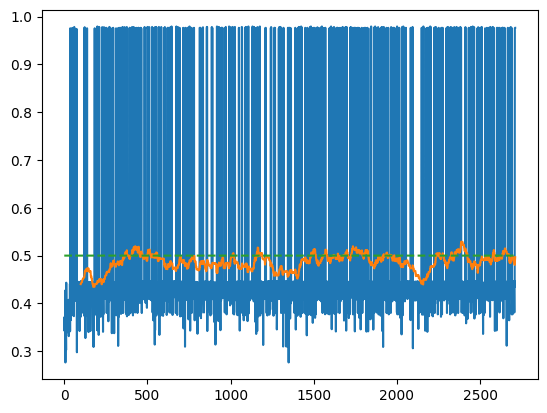

In [18]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')



------- Searching space of size 30676897 -------

...
best fitness updated to 0.382
...
best fitness updated to 0.456
..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
best fitness updated to 0.458
.....................................................

price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------
--------------------------------------------------
פאד תאי נודלס רידיפיין 🌱 - 59.0 ₪


price: ✅ vegetarian: ✅ GF: ✅ spicy: ✅ alcohol: ✅
--------------------------------------------------
--------------------------------------------------
קארי נודלס רידיפיין 🌱 🌶 - 59.0 ₪


price: ✅ vegetarian: ✅ GF: ❌ spicy: ✅ alcohol: ✅
--------------------------------------------------

Evolution Plot:


<AxesSubplot:>

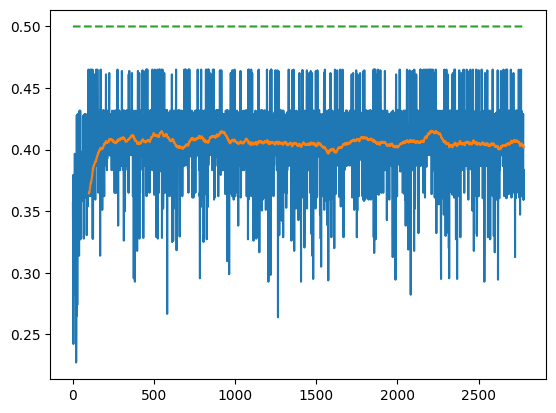

In [20]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')




In [44]:
from LossFunc import loss, user_inputs_to_loss_function_inputs
from main import get_diners_constraints


In [46]:
c = get_diners_constraints('./diners_input_constarints/input_constraints_2.txt')

([1, 0, 0, 0, 0, 90, 7, 0, ["'burger',", "'meat'"], 'monday'],
 [1, 1, 0, 1, 0, 80, 9, 1, ["'bagel',", "'thai'"], 'monday'],
 [0, 0, 0, 0, 1, 100, 7, 1, ["'salad','thai'"], 'monday'])

In [63]:
d = pd.read_csv('./data/csv_wolt_restaurants_21-8-22.csv')
d = d[d.name == best_solution[0].rest_name]

In [69]:
loss(user_inputs_to_loss_function_inputs(pd.Series(c[0]),
                                         pd.Series(c[1]),
                                         pd.Series(c[2]),
                                         d,
                                         pd.Series(best_solution[0]),
                                         pd.Series(best_solution[0]),
                                         pd.Series(best_solution[0])))

AttributeError: 'numpy.float64' object has no attribute 'values'

In [22]:
best_fitness = -np.inf
best_solution = np.nan
best_res = []
best_database = np.nan

found = False

combinations = 0
for _, df in groups:
    combinations += (df.shape[0] ** user_input['people'])

print(f'------- Searching space of size {combinations} -------\n')

start = time.time()
for restaurant, database in groups:
    print('...', end='')
    rest_input = rest_df.loc[restaurant]
    if rest_input.kosher != user_input['kosher']:
        continue
    if rest_input.rating < user_input["min_rating"]:
        continue
    
    database.reset_index(inplace=True, drop=True)
    res = []

    # choose run params:
    ga_instance = pygad.GA(num_generations         = 1000,
                           num_parents_mating      = 20,
                           sol_per_pop             = 30,
                           num_genes               = user_input['people'],

                           init_range_low          = 0,
                           init_range_high         = len(database),

                           random_mutation_min_val = 0,
                           random_mutation_max_val = len(database),

                           mutation_by_replacement = True,
                           mutation_num_genes      = 1,
                           mutation_probability    = 0.1,

                           gene_type               = int,
                           fitness_func            = fitness_function,
                          )

    # run:
    ga_instance.run()

    # print solution:
    solution, fitness, i = ga_instance.best_solution()
    
    if fitness > best_fitness:
        best_fitness = fitness
        best_res = res.copy()
        best_solution = solution
        best_database = database.copy()
        print(f'\nbest fitness updated to {round(best_fitness, 3)}', end='')
        if (not found) and (best_fitness > 0.5):
            initial = time.time()
            print(f"---> a solution was found ! 🏆 ({round(initial - start, 3)}s)")
            found = True
        else: print()

end = time.time()
best_solution = [best_database.iloc[i] for i in best_solution]

print(f'total time {round(end-start,3)}s')
print(f'\n----------------- Best solution ------------------\n')
print(f'Fitness:          {best_fitness}')
print(f'Hard constraints: {"🏆" if best_fitness > 0.5 else "🛑"}')
print(f'Total price:      {sum([dish["price"] for dish in best_solution])} ₪ (limit was {user_input["price"]} ₪)')
print()
[print_dish(best_solution, user_input, i) for i in range(len(best_solution))]

print()
print('Evolution Plot:')
pd.Series(best_res).plot()
pd.Series(best_res).rolling(window=100).mean().plot()
pd.Series(np.ones(len(best_res)) * 0.5).plot(style='--')




------- Searching space of size 30676897 -------

...
best fitness updated to 0.362
...............
best fitness updated to 0.394
.........
best fitness updated to 0.449
....................................................................................................................................
best fitness updated to 0.451
.................................................................................
best fitness updated to 0.457
.......................................................................................


KeyboardInterrupt

